**This notebook is an exercise in the [SQL](https://www.kaggle.com/learn/intro-to-sql) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/getting-started-with-sql-and-bigquery).**

---


# Introduction

The first test of your new data exploration skills uses data describing crime in the city of Chicago.

Before you get started, run the following cell. It sets up the automated feedback system to review your answers.

In [1]:
# Set up feedack system
from learntools.core import binder
binder.bind(globals())
from learntools.sql.ex1 import *
print("Setup Complete")

Using Kaggle's public dataset BigQuery integration.
Setup Complete


Use the next code cell to fetch the dataset.

In [2]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "chicago_crime" dataset
dataset_ref = client.dataset("chicago_crime", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


# Exercises

### 1) Count tables in the dataset

How many tables are in the Chicago Crime dataset?

In [3]:
# Write the code you need here to figure out the answer
tables = list(client.list_tables(dataset))

print(len(tables))

1


In [4]:
num_tables = 1  # Store the answer as num_tables and then run this cell

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

For a hint or the solution, uncomment the appropriate line below.

In [5]:
q_1.hint()
q_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use the `list_tables()` method to get a list of the tables in the dataset.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

# List all the tables in the "chicago_crime" dataset
tables = list(client.list_tables(dataset))

# Print number of tables in the dataset
print(len(tables))

num_tables = 1

```

### 2) Explore the table schema

How many columns in the `crime` table have `TIMESTAMP` data?

In [6]:
# Write the code to figure out the answer
crime_ref = dataset_ref.table("crime")
crime = client.get_table(crime_ref)

count = 0

for col in crime.schema:
    if col.field_type == "TIMESTAMP":
        count = count + 1

count

2

In [7]:
num_timestamp_fields = 2 # Put your answer here

# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

For a hint or the solution, uncomment the appropriate line below.

In [8]:
q_2.hint()
q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Begin by fetching the `crime` table. Then take a look at the table schema, and check the field type of each column.  How many times does `'TIMESTAMP'` appear?

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

# Construct a reference to the "crime" table
table_ref = dataset_ref.table("crime")

# API request - fetch the table
table = client.get_table(table_ref)

# Print information on all the columns in the "crime" table in the "chicago_crime" dataset
print(table.schema)

num_timestamp_fields = 2

```

### 3) Create a crime map

If you wanted to create a map with a dot at the location of each crime, what are the names of the two fields you likely need to pull out of the `crime` table to plot the crimes on a map?

In [9]:
# Write the code here to explore the data so you can find the answer
crime.schema

[SchemaField('unique_key', 'INTEGER', 'REQUIRED', None, (), None),
 SchemaField('case_number', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None),
 SchemaField('block', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('iucr', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('primary_type', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('description', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('location_description', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('arrest', 'BOOLEAN', 'NULLABLE', None, (), None),
 SchemaField('domestic', 'BOOLEAN', 'NULLABLE', None, (), None),
 SchemaField('beat', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('district', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('ward', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('community_area', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('fbi_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('x_coord

In [10]:
fields_for_plotting = ["latitude", "longitude"] # Put your answers here

# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

For a hint or the solution, uncomment the appropriate line below.

In [11]:
q_3.hint()
q_3.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Look at the table schema.  There are a couple options, but two of the fields are things commonly used to plot on maps. Both are `'FLOAT'` types. Use quotes around the field names in your answer.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
fields_for_plotting = ['latitude', 'longitude']
```

Thinking about the question above, there are a few columns that appear to have geographic data. Look at a few values (with the `list_rows()` command) to see if you can determine their relationship.  Two columns will still be hard to interpret. But it should be obvious how the `location` column relates to `latitude` and `longitude`.

In [19]:
!ls ../input/chicago-map

geo_export_ac40d740-205f-423a-958a-b4690d7b7fb5.dbf
geo_export_ac40d740-205f-423a-958a-b4690d7b7fb5.prj
geo_export_ac40d740-205f-423a-958a-b4690d7b7fb5.shp
geo_export_ac40d740-205f-423a-958a-b4690d7b7fb5.shx


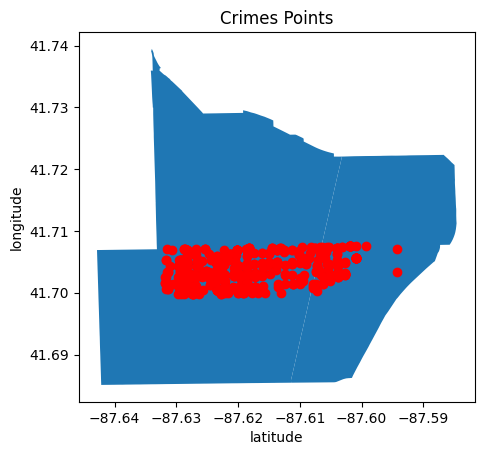

In [41]:
# Scratch space for your code
import matplotlib.pyplot as plt
import geopandas as gpd
import os

rows = client.list_rows(
    crime,
    selected_fields=crime.schema[-3:-1],
    max_results=500
).to_dataframe()

gdf = gpd.GeoDataFrame(
    rows,
    geometry=gpd.points_from_xy(
        rows.longitude, rows.latitude
    )
)

ax = gpd.read_file('../input/chicago-map/geo_export_ac40d740-205f-423a-958a-b4690d7b7fb5.shp')
ax = ax[ax.community.isin(["ROSELAND", "PULLMAN"])]

ax = ax.plot()
gdf.plot(ax=ax, color="red")

plt.title("Crimes Points")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

# Keep going

You've looked at the schema, but you haven't yet done anything exciting with the data itself. Things get more interesting when you get to the data, so keep going to **[write your first SQL query](https://www.kaggle.com/dansbecker/select-from-where).**

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-sql/discussion) to chat with other learners.*